# Cian Hogan
## Machine Learning and Statistics Module
## GMIT Data Analytics
### Final Assessment

<img src="https://docs.scipy.org/doc/scipy/_static/scipyshiny_small.png" alt="Scikit-Learn Logo" align="left" border=0/>  


# SciPy.stats

# Introduction

SciPy is a third-party python library for scientific computing. It is based on the numpy package and provides a collection of mathematical algorithms and conveniece functions for advanced statistical analysis. The package provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and more.(scipy.org, 2021)

Below are a list of all available modules within the SciPy ecosystem:
- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fft)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse eigenvalue problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)

This project will focus on the statistics package, scipy.stats, contained within the scipy library and examine how the package can be used to conduct hypothesis testing in the form of ANOVA.
***

# SciPy Stats

The scipy.stats module contains a vast array of array of statistical functions that provide access to probability distributions, summary and frequency statistics, kernal density estimates, correlation functions and statistical tests and  more.

The python package Numpy, for numerical computing, offers a number of statistical functions for quick calculations, such as mean, median, standard deviation ect. The scipy stats module exapnds on this fucntionality allowing the use of more advanced statistical functions, probability distributions and other statistical methods.(Bressert, E, 2013)


The scipy.stats provides functions for over 100 probability distributions, dozens of statistical functions and statistical tests. Each of these could be examined in great detail. For the purposes of this report, we will look specifically at performing an ANOVA anylsis using the methods provided within scipy.stats.
***

# Anova

ANOVA (Analysis of variance) is a statistical technique for examining the differences between the means of two or more populations. In general Anova is reserved for 3 or more populations as a t-test can be performed for 2 groups.

Typically the null hypothesis assumes that all group means are equal, and the alternative hypothesis is that the means are significantly different. For the null hypothesis to be rejected, the ANOVA must shows that there is sufficient evidence to support that the means are not the same.

An ANOVA must have a continous (metric) dependent variable, and two or more categorical (non-metric) independent variables. For example, house prices could be our dependent variable, a house has a distinct price in euros, and our indoendent variables could be province of purchase (Munster, Leinster, Connacht, Ulster). The indedepent variable is also called the factor. 

The simplest form of ANOVA is a one-way ANOVA where there is only one categorical variable to consider. If more than one factors are used, it requires an n-way ANOVA analysis. For the purposes of our analysis we will only consider a One-way ANOVA. (Malhorta,N & Birks,D, 2006)
***

# One-Way ANOVA
One-way ANOVA examines the difference on the mean values of a dependent variable, for several categories of a single independent variable. 



In [29]:
import pandas as pd
from scipy import stats
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [13]:
rng = np.random.default_rng(seed=49)

a = rng.normal(100, 10, 10)
b = rng.normal(100, 20, 10)
c = rng.normal(100, 30, 10)

In [14]:
a

array([105.70656014, 113.82608142, 102.38853758,  84.80633765,
       101.20163423, 101.09040852,  94.1199527 ,  83.62152185,
        99.29779664,  80.83769275])

In [24]:
a.mean()

temp=[]

for i in a:
    temp.append((i-a.mean())**2)


In [27]:
sum(temp)/len(temp)

102.38433548667535

In [15]:
b

array([ 96.64050049,  99.67777834, 148.77411663, 121.89796377,
       117.80877428, 110.04944334,  95.3312948 ,  94.33725994,
        89.08314045, 116.32174082])

In [16]:
c

array([141.94943148,  90.51198746,  97.36593257, 121.81669451,
       143.70055733, 145.85900617, 166.05482067, 121.78268338,
       123.57038082, 138.16557472])

In [28]:
stats.f_oneway(*[a,b,c])

F_onewayResult(statistic=8.31168452446194, pvalue=0.0015388687204146575)

In [16]:
d = rng.normal(2, .5, 100)
f = rng.normal(2, .7, 100)
g = rng.normal(2, 1, 100)

In [17]:
stats.f_oneway(d,f,g)

F_onewayResult(statistic=0.6668553786712297, pvalue=0.5140871101527037)

In [62]:
data = datasets.load_wine()

In [63]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [64]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [66]:
df['target']= data.target



In [71]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [76]:
group_A = df[df['target']==0]
group_B = df[df['target']==1]
group_C = df[df['target']==2]

groups = [group_A, group_B, group_C]

count = 0
for group in groups:
    
    print(f"Group: {count}:\n {group.describe()}")
    count +=1

Group: 0:
          alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  59.000000   59.000000  59.000000          59.000000   59.000000   
mean   13.744746    2.010678   2.455593          17.037288  106.338983   
std     0.462125    0.688549   0.227166           2.546322   10.498949   
min    12.850000    1.350000   2.040000          11.200000   89.000000   
25%    13.400000    1.665000   2.295000          16.000000   98.000000   
50%    13.750000    1.770000   2.440000          16.800000  104.000000   
75%    14.100000    1.935000   2.615000          18.700000  114.000000   
max    14.830000    4.040000   3.220000          25.000000  132.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.840169    2.982373              0.290000         1.899322   
std         0.338961    0.397494              0.070049         0.412109   
min         2.200000  

In [79]:
stats.f_oneway(group_A["alcohol"],group_B["alcohol"],group_C["alcohol"])

F_onewayResult(statistic=135.07762424279912, pvalue=3.319503795619655e-36)

In [80]:
stats.f_oneway(group_A["hue"],group_B["hue"],group_C["hue"])

F_onewayResult(statistic=101.31679539030002, pvalue=5.9176622163620664e-30)

In [39]:
# F Distribution
dfn, dfd = 29, 18

X = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)


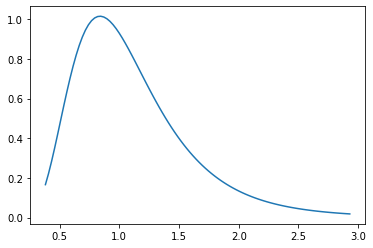

In [40]:
plt.plot(X, stats.f.pdf(X, dfn, dfd))

# References

(scipy.org, 2021)

(Bressert, E, 2013)

(Malhorta,N & Birks,D, 2006)

https://realpython.com/numpy-scipy-pandas-correlation-python/
    
https://docs.scipy.org/doc/scipy/reference/tutorial/general.html

Numpy & Scipy file:///C:/Users/hogan/Downloads/Eli%20Bressert%20-%20SciPy%20and%20NumPy_%20An%20Overview%20for%20Developers-O'Reilly%20Media%20(2012).pdf